In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.decomposition import PCA

In [4]:
from xgboost import XGBRegressor

In [5]:
from sklearn.metrics import mean_squared_error

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')



In [ ]:
#I removed Columns with Zero variance (no differnce)

In [7]:
numeric_columns_train = train_df.select_dtypes(include=[np.number])
zero_variance_cols_train = numeric_columns_train.columns[numeric_columns_train.var() == 0]
train_df = train_df.drop(zero_variance_cols_train, axis=1)

In [8]:
numeric_columns_test = test_df.select_dtypes(include=[np.number])
zero_variance_cols_test = numeric_columns_test.columns[numeric_columns_test.var() == 0]
test_df = test_df.drop(zero_variance_cols_test, axis=1)

In [35]:
# Checked null values in the training data
print("Null values in training set:")
print(train_df.isnull().sum())

Null values in training set:
ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 366, dtype: int64


In [36]:
# Checking  unique values in the training data
print("\nUnique values in training set:")
print(train_df.nunique())


Unique values in training set:
ID      4209
y       2545
X0        47
X1        27
X2        44
        ... 
X380       2
X382       2
X383       2
X384       2
X385       2
Length: 366, dtype: int64


In [40]:
# Checked for null values in the test data
print("\nNull values in test set:")
print(test_df.isnull().sum())




Null values in test set:
ID      0
X0      0
X1      0
X2      0
X3      0
       ..
X295    0
X296    0
X369    0
X257    0
X258    0
Length: 377, dtype: int64


In [38]:
# Checked for unique values in the test data
print("\nUnique values in test set:")
print(test_df.nunique())


Unique values in test set:
ID      4209
X0        49
X1        27
X2        45
X3         7
        ... 
X295       1
X296       1
X369       1
X257       1
X258       1
Length: 377, dtype: int64


In [43]:
#label encoding
label_encoder = LabelEncoder()
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])

for col in test_df.select_dtypes(include=['object']).columns:
    test_df[col] = label_encoder.fit_transform(test_df[col])

In [10]:
common_columns = list(set(train_df.columns).intersection(test_df.columns))
X_test = test_df[common_columns]

In [16]:
for col in train_df.select_dtypes(include=['object']).columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    test_df[col] = label_encoder.transform(test_df[col])

In [20]:
#dimensionality reduction
pca = PCA(n_components=0.95)


In [21]:
X_train = train_df.drop('y', axis=1)


In [23]:
X_test = test_df


In [24]:
X_train_pca = pca.fit_transform(X_train)


In [28]:
missing_columns = set(X_train.columns) - set(X_test.columns)
for col in missing_columns:
    X_test[col] = 0

In [29]:
X_test = X_test[X_train.columns]

In [30]:
X_test_pca = pca.transform(X_test)

In [44]:
#predicted values using XGBoost
model = XGBRegressor()
model.fit(X_train_pca, train_df['y'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [32]:
test_predictions = model.predict(X_test_pca)


In [45]:
#finding dataset
print(test_predictions)


[128.08005 128.08005 128.08005 ... 107.63611  90.76683  90.76683]


In [46]:
import matplotlib.pyplot as plt


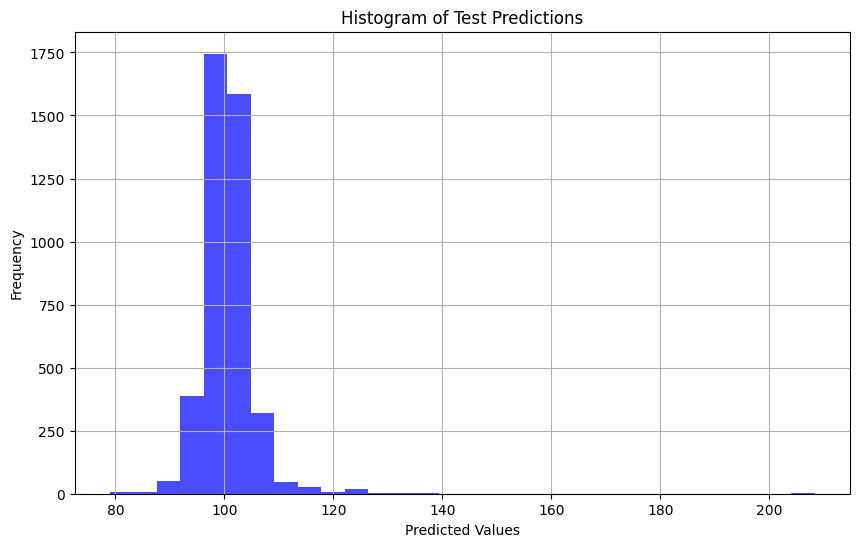

In [47]:
# histogram
plt.figure(figsize=(10, 6))
plt.hist(test_predictions, bins=30, color='blue', alpha=0.7)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Histogram of Test Predictions')
plt.grid(True)
plt.show()

In [ ]:
#endof project